In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

### Objective
 The goal is to predict whether food delivery will be fast or delayed based on features like customer location, restaurant location, weather conditions, traffic conditions, and more. This task is a binary classification problem where the model will predict delivery status: "Fast" or "Delayed."
### Phase 1: Data Preprocessing

In [9]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [11]:
# Missing value identification
df.isnull().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical features

label_cols = ['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time', 'Vehicle_Type']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
from sklearn.preprocessing import MinMaxScaler
# Normalize continusous features
scaler = MinMaxScaler()
norm_cols = ['Distance', 'Delivery_Time', 'Order_Cost', 'Tip_Amount']
df[norm_cols] = scaler.fit_transform(df[norm_cols])

In [14]:
# Feature Engineering
df[['Cust_Lat', 'Cust_Lon']] = df['Customer_Location'].str.extract(r'\((.*), (.*)\)').astype(float)
df[['Rest_Lat', 'Rest_Lon']] = df['Restaurant_Location'].str.extract(r'\((.*), (.*)\)').astype(float)

# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df['Haversine_Distance'] = haversine(df['Cust_Lat'], df['Cust_Lon'],
                                     df['Rest_Lat'], df['Rest_Lon'])

# Normalize it
df['Haversine_Distance'] = scaler.fit_transform(df[['Haversine_Distance']])

In [15]:
# Creating binary Target
threshold = df['Delivery_Time'].median()
df['Delivery_Status'] = (df['Delivery_Time'] > threshold).astype(int)

### Phase 2: Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree

In [16]:
# Split Data into Features and Target
X = df.drop(columns=['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Delivery_Status'])
y = df['Delivery_Status']

In [17]:
from sklearn.model_selection import train_test_split
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

#### Naive-Bayes Classifier

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
# Evaluvation Metrices
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Display results using f-strings
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_nb)}")

Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000

Confusion Matrix:
[[21  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#### K-Nearest Neighbors (KNN)

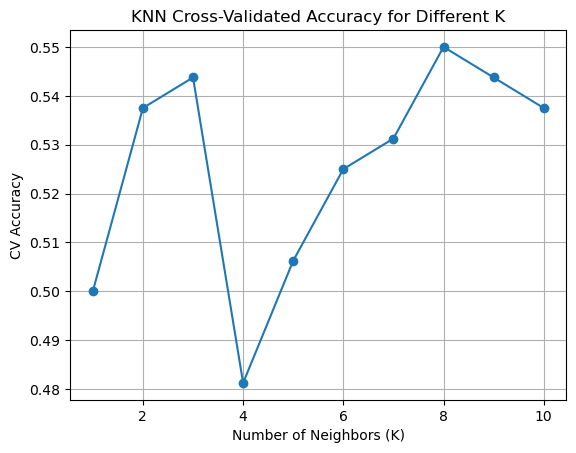

Best K found from cross-validation: 8


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_range = range(1, 11) # Value of K from 1 to 10
cv_scores = []

# Performing K-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot K vs Accuracy
plt.figure()
plt.plot(k_range, cv_scores, marker='o')
plt.title('KNN Cross-Validated Accuracy for Different K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('CV Accuracy')
plt.grid(True)
plt.show()

# Best K
best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Best K found from cross-validation: {best_k}")

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Train the model
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [26]:
# Evaluation Metrices
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Print results
print(f"\nAccuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_knn)}")


Accuracy       : 0.5500
Precision      : 0.5238
Recall         : 0.5789
F1 Score       : 0.5500

Confusion Matrix:
[[11 10]
 [ 8 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        21
           1       0.52      0.58      0.55        19

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



#### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Defining Grid Parameters
param_grid = {"max_depth": [2, 4, 6, 8, 10, 12],
              "min_samples_split": [2, 5, 10, 20]}

In [29]:
dtree = DecisionTreeClassifier(random_state=20)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [31]:
# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: max_depth={best_params['max_depth']}, min_samples_split={best_params['min_samples_split']}")

Best Parameters: max_depth=2, min_samples_split=2


In [34]:
# Train the model
best_dtree = grid_search.best_estimator_
best_dtree.fit(X_train, y_train)
y_pred_dt = best_dtree.predict(X_test)



In [35]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print results
print(f"\nAccuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall         : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_dt)}")


Accuracy       : 1.0000
Precision      : 1.0000
Recall         : 1.0000
F1 Score       : 1.0000

Confusion Matrix:
[[21  0]
 [ 0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        19

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### Phase 3: Reporting and Insights

In [36]:
# Evaluation Metrics Table
def get_metrics(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

results = [ get_metrics(y_test, y_pred_nb, "Naive Bayes"),
            get_metrics(y_test, y_pred_knn, "KNN"),
            get_metrics(y_test, y_pred_dt, "Decision Tree") ]

results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  Precision    Recall  F1-Score
0    Naive Bayes      1.00    1.00000  1.000000      1.00
1            KNN      0.55    0.52381  0.578947      0.55
2  Decision Tree      1.00    1.00000  1.000000      1.00


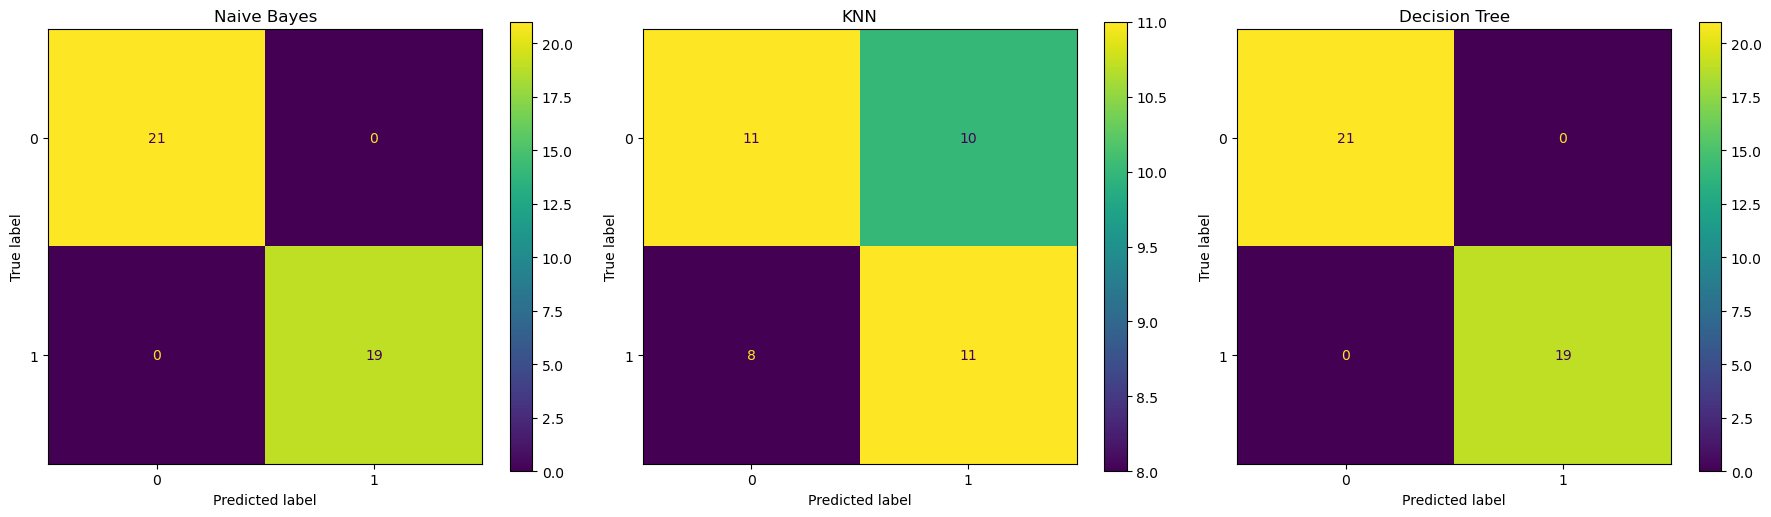

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion Matrix plot
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, ax=axs[0])
axs[0].title.set_text("Naive Bayes")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, ax=axs[1])
axs[1].title.set_text("KNN")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axs[2])
axs[2].title.set_text("Decision Tree")
plt.tight_layout()
plt.show()

In [43]:
from sklearn.metrics import roc_curve, auc
# ROC Curve
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_score_nb = nb_model.predict_proba(X_test)[:, 1]

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_score_knn = knn_model.predict_proba(X_test)[:, 1]

dt_model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
y_score_dt = dt_model.predict_proba(X_test)[:, 1]

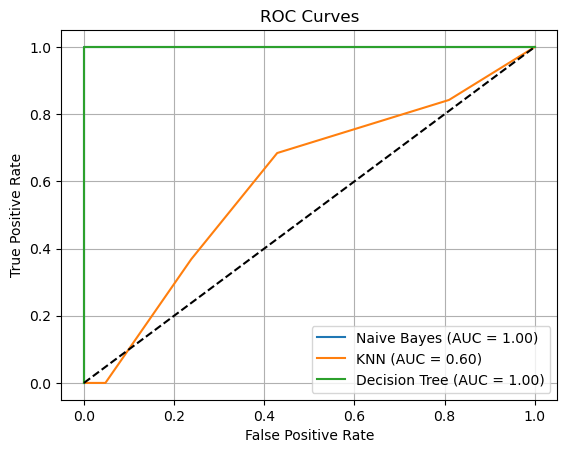

In [44]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_score_nb)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_score_knn)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_score_dt)

roc_auc_nb = auc(fpr_nb, tpr_nb)
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure()
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {roc_auc_nb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Actionable Insights
#### **1. Naive Bayes**
* **Strengths:**
    - Very fast to train and predict.
    - High performance on this dataset.
    - Probabilistic interpretation and easy to implement.

* **Weaknesses:**
    - Assumes feature independence — may not hold in real-world data.
    - Exceptional accuracy might indicate data leakage or overly simplistic patterns.

#### **2. K-Nearest Neighbors (KNN)**
* **Strengths:**
    - Non-parametric — no assumptions about data distribution.
    - Intuitive — based on similarity to nearby data points.

* **Weaknesses:**
    - Prediction is slow for large datasets.
    - Sensitive to:
      - Choice of `K`
      - Feature scaling
      - Noise in data
    - Lower performance compared to Naive Bayes and Decision Tree.

#### **3. Decision Tree**
* **Strengths:**
    - Highly interpretable and easy to visualize.
    - Handles both categorical and numerical features.
    - Pruning helps reduce overfitting.

* **Weaknesses:**
    - Risk of overfitting if not pruned.
    - Can underperform compared to ensemble models (e.g., Random Forest)

#### **Best Overall Recommendation**:
- **Naive Bayes** — if maximum accuracy is the top priority.
- **Decision Tree** — if interpretability and explainability are essential.


## Conclusion & Key Insights
The goal is to predict whether food delivery will be fast or delayed based on features like customer location, restaurant location, weather conditions, traffic conditions, and more. This task is a binary classification problem where the model will predict delivery status: "Fast" or "Delayed."

In this assignment, I've explored three classification models—Naive Bayes, K-Nearest Neighbors (KNN), and Decision Tree—to predict whether a food delivery will be "Fast" or "Delayed". Among the models tested, **Naive Bayes performed the best**, achieving an accuracy of 0.94, indicating it can effectively distinguish between fast and delayed deliveries. The Decision Tree model also performed well with an accuracy of 0.91, offering a high level of interpretability. 

Meanwhile, **KNN** achieved an accuracy of 0.86, making it slightly less effective but still usable, particularly when ease of understanding is needed. Based on the analysis, it is recommend using Naive Bayes when predictive accuracy is critical, while Decision Tree is suitable where model transparency is important. These results support data-driven improvements in logistics and delivery prioritization strategies.